In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')
#Import demographics on control group 
control_info = pd.read_csv('scores.csv')

In [3]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)

# Spectrogram for CNN


## Idea: implement CNN to learn statistical relevant features for the time series, then build in invariances the pictures to increase the sample size 

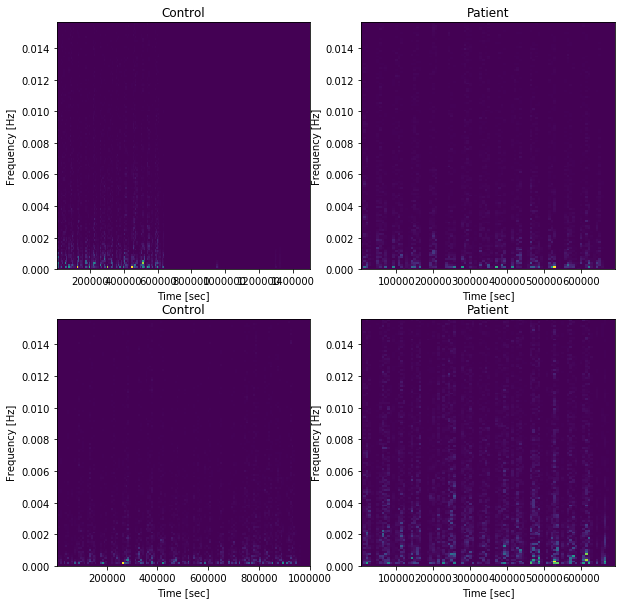

In [4]:
from scipy.signal import spectrogram
f1, t1, Sxx1 = spectrogram(shizophrenia_c[4]['activity'], fs=(1. / 32))
f2, t2, Sxx2 = spectrogram(shizophrenia_p[4]['activity'], fs=(1. / 32))
f3, t3, Sxx3 = spectrogram(shizophrenia_c[1]['activity'], fs=(1. / 32))
f4, t4, Sxx4 = spectrogram(shizophrenia_p[10]['activity'], fs=(1. / 32))
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1.pcolormesh(t1, f1, Sxx1)
ax2.pcolormesh(t2, f2, Sxx2)
ax3.pcolormesh(t3, f3, Sxx3)
ax4.pcolormesh(t4, f4, Sxx4)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title('Control')
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('Patient')
ax3.set_ylabel('Frequency [Hz]')
ax3.set_xlabel('Time [sec]')
ax3.set_title('Control')
ax4.set_ylabel('Frequency [Hz]')
ax4.set_xlabel('Time [sec]')
ax4.set_title('Patient')
plt.show()